# Examine Results

In [1]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom_test, chi2_contingency

from convnwb.paths import Paths

from spiketools.plts.data import plot_hist, plot_bar
from spiketools.plts.utils import make_axes, save_figure
from spiketools.plts.annotate import add_hlines

In [2]:
import seaborn as sns
sns.set_context('talk', font_scale=0.9)

In [3]:
# Set pandas display options
pd.options.display.max_columns = None

## Settings

In [4]:
# Set data path to load from
results_path = Path('../results/units/all/')

In [5]:
# Set which experiment version to run
stimulus_version = 'object'   # 'face', 'object'

In [6]:
# Get the filename for the combined results file
results_fname = 'all_results-' + stimulus_version + '.csv'

In [7]:
# Define a list of analyses
th_analyses = ['chest', 'place', 'target', 'serial'] 
nb_analyses = ['baseline', 'id']
analyses = th_analyses + nb_analyses

In [8]:
# Statistics settings
alpha_level = 0.05
binom_sidedness = 'greater'    # 'two-sided', 'greater', 'less'

## Load Results

In [9]:
# Load results
all_results = pd.read_csv(results_path / results_fname)

In [10]:
# Check the head of the results
all_results.head()

,uid,session_id,subject_id,wvID,keep,n_spikes,firing_rate,presence_ratio,cluster,channel,location,fr_t_val_all,fr_p_val_all,fr_t_val_empt,fr_p_val_empt,fr_t_val_full,fr_p_val_full,place_anova,target_anova,serial_anova,place_anova_surr_p_val,place_anova_surr_z_score,target_anova_surr_p_val,target_anova_surr_z_score,serial_anova_surr_p_val,serial_anova_surr_z_score,is_chest,is_place,is_target,is_serial,region,side,id_fvalue,baseline_tvalue,is_id,is_baseline,id_type,baseline_tvalue_abs,fr_t_val_full_abs,keep_th
0,0,THO_wv001_session_0,wv001,1,True,595,0.402114,0.821918,5169,A10,LAH,0.096174,0.923585,-0.627103,0.534661,0.607628,0.545766,0.536361,0.511021,0.676014,0.856,-0.842366,0.856,-0.938975,0.607,-0.427371,False,False,False,False,AH,left,1.390856,2.443102,True,True,single,2.443102,0.607628,True
1,2,THO_wv001_session_0,wv001,3,True,22559,15.259095,1.000000,5200,A10,LAH,0.532078,0.595914,1.401202,0.169959,-0.540276,0.591040,1.205246,2.266768,1.098669,0.287,0.404469,0.040,2.090485,0.381,0.009386,False,False,True,False,AH,left,1.377027,0.284767,False,False,NaN,0.284767,0.540276,True
2,3,THO_wv001_session_0,wv001,4,True,4583,3.115527,1.000000,5203,A10,LAH,1.323994,0.188682,0.117595,0.907061,1.616886,0.111238,1.488245,1.687129,2.034143,0.134,1.117659,0.158,1.002798,0.091,1.325692,False,False,False,False,AH,left,1.368211,0.216492,False,False,NaN,0.216492,1.616886,True
3,4,THO_wv001_session_0,wv001,5,True,990,0.675442,0.958904,2248,A12,LAH,0.000000,1.000000,-0.597614,0.553945,0.433472,0.666253,0.362834,0.788821,0.686159,0.973,-1.240125,0.623,-0.458876,0.630,-0.475896,False,False,False,False,AH,left,0.811142,0.345003,False,False,NaN,0.345003,0.433472,True
4,5,THO_wv001_session_0,wv001,6,True,5965,4.060187,1.000000,2303,A12,LAH,-1.315754,0.191423,0.828417,0.413048,-2.313347,0.024208,0.553021,1.297559,0.678876,0.868,-0.972511,0.210,0.723683,0.417,-0.035455,True,False,False,False,AH,left,0.757119,-1.142316,False,False,NaN,1.142316,2.313347,True


In [11]:
# Check the columns in the loaded file
all_results.columns

Index(['uid', 'session_id', 'subject_id', 'wvID', 'keep', 'n_spikes',
       'firing_rate', 'presence_ratio', 'cluster', 'channel', 'location',
       'fr_t_val_all', 'fr_p_val_all', 'fr_t_val_empt', 'fr_p_val_empt',
       'fr_t_val_full', 'fr_p_val_full', 'place_anova', 'target_anova',
       'serial_anova', 'place_anova_surr_p_val', 'place_anova_surr_z_score',
       'target_anova_surr_p_val', 'target_anova_surr_z_score',
       'serial_anova_surr_p_val', 'serial_anova_surr_z_score', 'is_chest',
       'is_place', 'is_target', 'is_serial', 'region', 'side', 'id_fvalue',
       'baseline_tvalue', 'is_id', 'is_baseline', 'id_type',
       'baseline_tvalue_abs', 'fr_t_val_full_abs', 'keep_th'],
      dtype='object')

### Location Checks

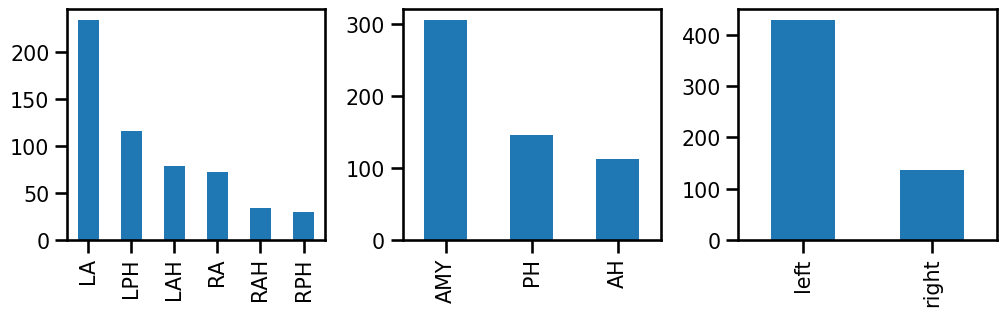

In [12]:
# Plot the unit counts per location
axes = make_axes(3, 3, figsize=(12, 3), wspace=0.3)
all_results['location'].value_counts().plot(kind='bar', ax=axes[0]);
all_results['region'].value_counts().plot(kind='bar', ax=axes[1]);
all_results['side'].value_counts().plot(kind='bar', ax=axes[2]);

## Check Results

In [13]:
# Get total number of units
n_units = len(all_results)
print('Total number of cells: {}'.format(n_units))

Total number of cells: 565


In [14]:
# Collect numbers of significant cells
results = {}
for analysis in analyses:
    results[analysis] = sum(all_results['is_' + analysis])

In [15]:
# Compute significance of the counts of detected neurons
stats = {}
for analysis in analyses:
    stats[analysis] = binom_test(results[analysis], n_units, alpha_level, binom_sidedness)

In [16]:
# Check the number & percent of significant cells per analysis
print('{} - total cells: {}\n'.format(stimulus_version, n_units))
for analysis in analyses:
    print('# {} cells:     \t\t{:3d}  ({:5.2f}%) \t\t {:.4f}'.format(\
        analysis, results[analysis], results[analysis] / n_units * 100, stats[analysis]))

object - total cells: 565

# chest cells:     		 61  (10.80%) 		 0.0000
# place cells:     		 28  ( 4.96%) 		 0.5462
# target cells:     		 40  ( 7.08%) 		 0.0187
# serial cells:     		 77  (13.63%) 		 0.0000
# baseline cells:     		 69  (12.21%) 		 0.0000
# id cells:     		 83  (14.69%) 		 0.0000


#### Drop non-significant analyses

In [18]:
# # ...
# remove = ['place']
# for el in remove:
#     if el in th_analyses:
#         th_analyses.remove(el)

## Check Results by Subject / Session

In [19]:
# Check the number of detected cells per subject
pd.pivot_table(all_results, ['is_' + el for el in analyses], index='subject_id', aggfunc=np.sum)

,is_baseline,is_chest,is_id,is_place,is_serial,is_target
subject_id,,,,,,
wv001,24,14,14,8,19,8
wv002,6,6,7,2,12,10
wv003,7,4,11,1,3,2
wv004,31,36,49,16,38,18
wv005,1,1,2,1,5,2


In [20]:
# Check the number of detected cells per session
pd.pivot_table(all_results, ['is_' + el for el in analyses], index=['subject_id', 'session_id'], aggfunc=np.sum)

is_baseline  is_chest  is_id  is_place  \
subject_id session_id                                                    
wv001      THO_wv001_session_0           14         5      4         1   
           THO_wv001_session_2           10         9     10         7   
wv002      THO_wv002_session_0            0         1      1         0   
           THO_wv002_session_1            2         4      4         1   
           THO_wv002_session_2            4         1      2         1   
wv003      THO_wv003_session_0            1         1      5         0   
           THO_wv003_session_1            6         3      6         1   
wv004      THO_wv004_session_0           12        18     20         5   
           THO_wv004_session_1            8         6     15         4   
           THO_wv004_session_2            3         5     10         4   
           THO_wv004_session_3            8         7      4         3   
wv005      THO_wv005_session_0            1         1      2         1   

                                is_serial  is_target  
subject_id session_id                                 
wv001      THO_wv001_session_0          7          2  
           THO_wv001_session_2         12          6  
wv002      THO_wv002_session_0          1          1  
           THO_wv002_session_1         10          4  
           THO_wv002_session_2          1          5  
wv003      THO_wv003_session_0          0          2  
           THO_wv003_session_1          3          0  
wv004      THO_wv004_session_0         19          5  
           THO_wv004_session_1          5          7  
           THO_wv004_session_2          3          1  
           THO_wv004_session_3         11          5  
wv005      THO_wv005_session_0          5          2

## Results by Area

Analyze the results split up by area

Anatomical organization:
- 'region': a brain region, collapsing across left & right
- 'location': a specific location, split up by left & right

In [21]:
# Collect different area organizations together
places = {'region' : set(all_results['region']),
          'location' : set(all_results['location'])}

In [22]:
# Define which area organization to use
place = 'region'

In [23]:
#
region_results = {}
for analysis in analyses:

    region_results[analysis] = {}
    
    region_results[analysis]['all'] = {}
    region_results[analysis]['all']['count'] = results[analysis] 
    region_results[analysis]['all']['percent'] = results[analysis] / n_units

    for cplace in places[place]:
        temp = all_results[all_results[place] == cplace]
        
        region_results[analysis][cplace] = {}
        region_results[analysis][cplace]['count'] = sum(temp['is_' + analysis])
        region_results[analysis][cplace]['percent'] = sum(temp['is_' + analysis]) / len(temp)

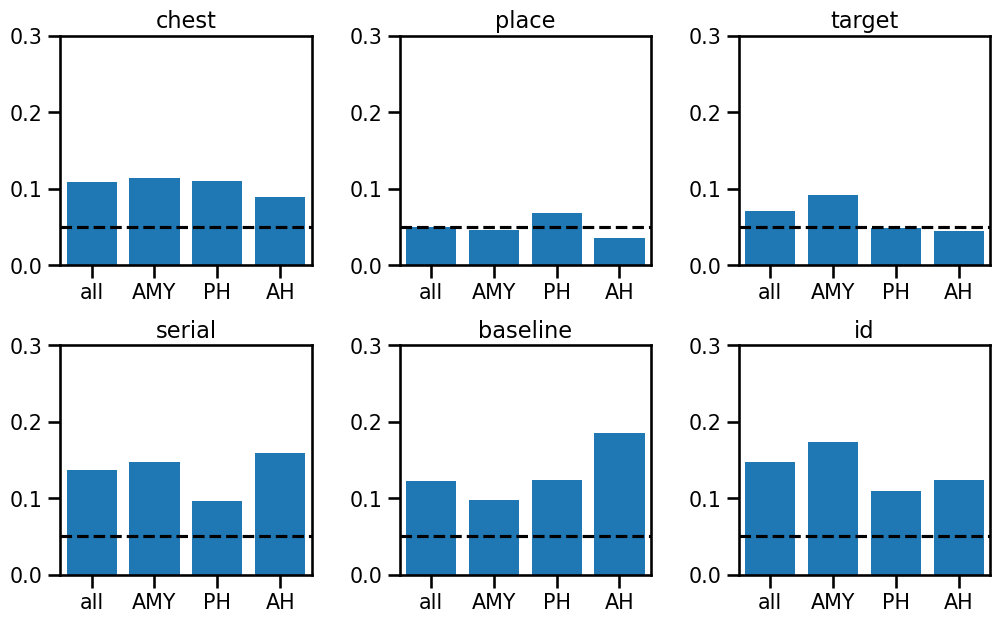

In [24]:
axes = make_axes(len(analyses), 3, hspace=0.35, wspace=0.35, figsize=(12, 7))
for analysis, ax in zip(analyses, axes):
    labels = list(region_results[analysis].keys())
    values = [region_results[analysis][label]['percent'] for label in labels]
    plot_bar(values, labels, title=analysis, ylim=[0, 0.30], ax=ax)
    add_hlines(0.05, linestyle='--', color='black', ax=ax)

In [25]:
region_counts = all_results['region'].value_counts().to_dict()
region_counts['all'] = n_units

In [26]:
for canalysis, cregion_dict in region_results.items():
    for cregion, cdict in cregion_dict.items():
        region_results[canalysis][cregion]['p_value'] = \
            binom_test(cdict['count'], region_counts[cregion], alpha_level, binom_sidedness)

In [27]:
# Check full set of results
#region_results

## Within Task Overlap

Check overlap of having multiple labels within each task.

### Treasure Hunt

Compute the overlap of labels within TH task

In [28]:
# Compute overlap between labels within TH task
over = np.zeros([len(th_analyses), len(th_analyses)])
for i1, acol1 in enumerate(th_analyses):
    a1res = set(all_results[all_results['is_' + acol1]].wvID.values)
    
    for i2, acol2 in enumerate(th_analyses):
        a2res = set(all_results[all_results['is_' + acol2]].wvID.values)
        
        over[i1, i2] = len(a1res.intersection(a2res)) / len(a1res)

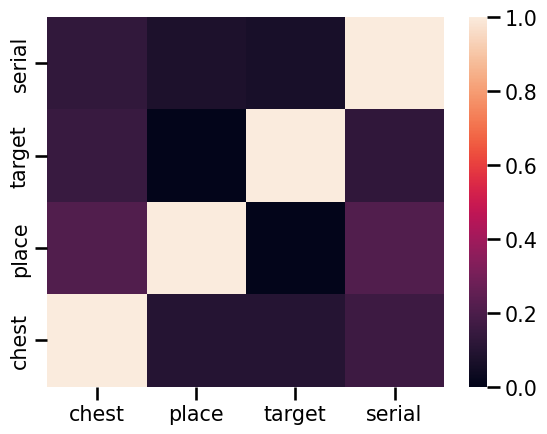

In [29]:
# Plot the overlap between TH labels
ax = sns.heatmap(over, xticklabels=th_analyses, yticklabels=th_analyses)
ax.invert_yaxis()

### nBack

In [30]:
# Check overlap of baseline and ID within nback
a1_nb = set(all_results[all_results['is_baseline']].wvID.values)
a2_nb = set(all_results[all_results['is_id']].wvID.values)
nb_over = len(a1_nb.intersection(a2_nb)) / len(a1_nb)
print('1B overlap: {:1.4f}%'.format(nb_over))

1B overlap: 0.2464%


# Compute Between Task Overlap

In [31]:
for nb_analysis in nb_analyses:
    
    print('\n', stimulus_version, ' - ', nb_analysis, '\n')
    print('\t {} \t {} \t {} \t {} \t\t {} \t\t{}'.format('#NB', '#TH', '#Over', '%Over', 'pval', 'exp'))
    
    nb_data = all_results[all_results['is_' + nb_analysis]].wvID.values

    for analysis in th_analyses:

        th_data = all_results[all_results['is_' + analysis]].wvID.values
        n_th = len(th_data)
        n_nb = len(nb_data)

        inter = len(set(th_data).intersection(set(nb_data)))

        arr = np.array([[inter, n_th-inter],
                        [n_nb-inter, n_units-n_th-n_nb+inter]])
        tstat, pval, dof, exp = chi2_contingency(arr, False)

        print('{} \t {} \t {} \t {} \t {:5.2f}% \t {:5.4f} \t {:2d}'.format(\
            analysis, n_nb, n_th, inter, (inter / n_nb) * 100, pval, round(exp[0][0])))


 object  -  baseline 

	 #NB 	 #TH 	 #Over 	 %Over 		 pval 		exp
chest 	 69 	 61 	 15 	 21.74% 	 0.0018 	  7
place 	 69 	 28 	 7 	 10.14% 	 0.0340 	  3
target 	 69 	 40 	 7 	 10.14% 	 0.2894 	  5
serial 	 69 	 77 	 17 	 24.64% 	 0.0044 	  9

 object  -  id 

	 #NB 	 #TH 	 #Over 	 %Over 		 pval 		exp
chest 	 83 	 61 	 15 	 18.07% 	 0.0207 	  9
place 	 83 	 28 	 1 	  1.20% 	 0.0882 	  4
target 	 83 	 40 	 8 	  9.64% 	 0.3251 	  6
serial 	 83 	 77 	 13 	 15.66% 	 0.5586 	 11
